In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg


#FOURIER TRANSFORM

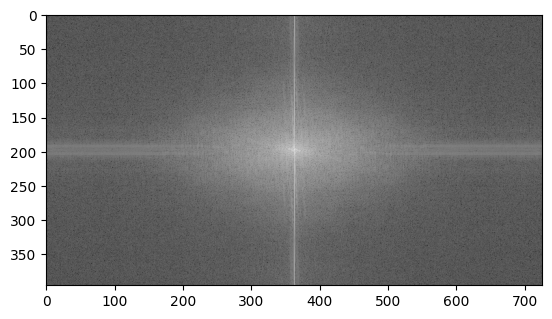

In [2]:
birds = cv2.imread('rasm/birds.jpg')
birds = cv2.cvtColor(birds,cv2.COLOR_BGR2GRAY)
birds = birds/255.0
def fr(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    spectum = 20*np.log(np.abs(fshift))
    return spectum
plt.imshow(fr(birds),cmap='gray')

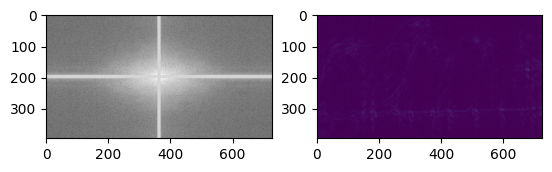

In [3]:
qush = cv2.imread('rasm/birds.jpg')
qush = cv2.cvtColor(qush,cv2.COLOR_BGR2GRAY)
qush=qush/255.0
f = np.fft.fft2(qush)
fshift = np.fft.fftshift(f)
fshift[:,fshift.shape[1]//2-5:fshift.shape[1]//2+5]=100
fshift[fshift.shape[0]//2-5:fshift.shape[0]//2+5,:]=100
plt.subplot(121)
plt.imshow(np.log(np.abs(fshift)),cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(np.fft.ifft2(fshift)))

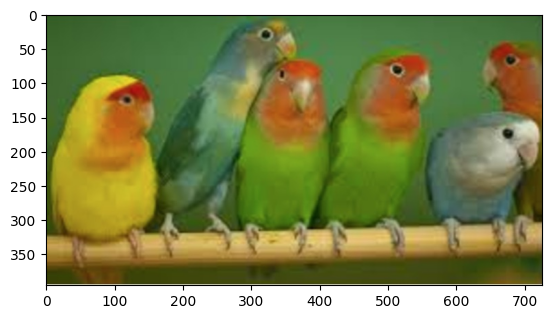

In [4]:
qush = cv2.imread('rasm/birds.jpg')
qush = cv2.cvtColor(qush,cv2.COLOR_BGR2RGB)
plt.imshow(qush)

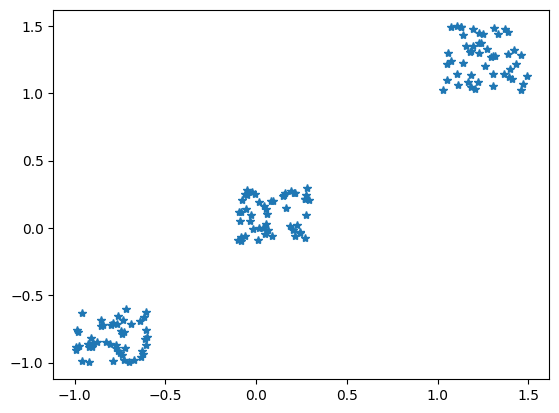

In [5]:
a1 = np.random.random((50,2))*0.5 + np.ones((50,2))
a2 = np.random.random((50,2))*0.4 - 0.1*np.ones((50,2))
a3 = np.random.random((50,2))*0.4 - np.ones((50,2))

A = np.concatenate((a1,a2,a3),axis=0)
plt.plot(A[:,0],A[:,1],'*')
plt.show()

In [6]:
A = np.float32(A)

In [7]:
#cv2.TERM_CRITERIA_EPS
#cv2.TERM_CRITERIA_MAX_ITER
#cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,3,0.1)
#flags = cv2.KMEANS_RANDOM_CENTERS, cv2.KMEANS_PP_CENTERS
k=1
summa,lebel,center = cv2.kmeans(A,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(summa)
print(len(lebel))
print(center)


218.38560067187063
150
[[0.1817104  0.18183684]]


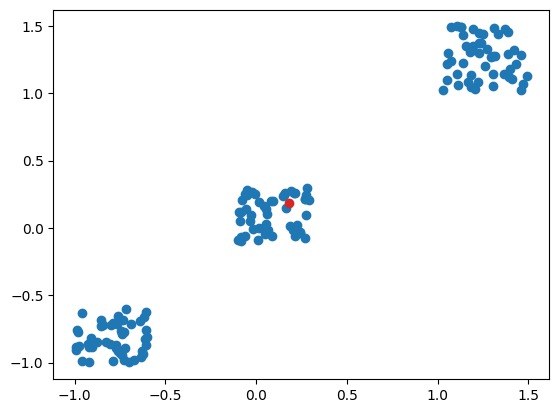

In [8]:
a1 = A[lebel.flatten()==0]
a2 = A[lebel.flatten()==1]
a3 = A[lebel.flatten()==2]

plt.scatter(a1[:,0],a1[:,1])
plt.scatter(a2[:,0],a2[:,1])
plt.scatter(a3[:,0],a3[:,1])
plt.scatter(center[:,0],center[:,1])
plt.show()


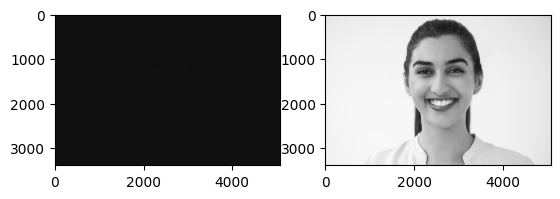

In [9]:
odam = cv2.imread('rasm/face1.jpg')
gray = cv2.cvtColor(odam,cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray,80,255)
gray=np.float32(gray)
corner = cv2.cornerHarris(gray,5,7,0.05)
plt.subplot(121)
plt.imshow(corner,cmap='gray')
plt.subplot(122)
plt.imshow(gray,cmap='gray')
plt.show()

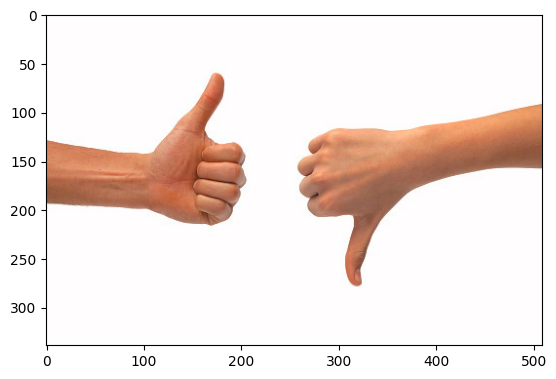

In [2]:
game = cv2.imread('rasm/11.jpg')
game = cv2.cvtColor(game,cv2.COLOR_BGR2RGB)
plt.imshow(game)

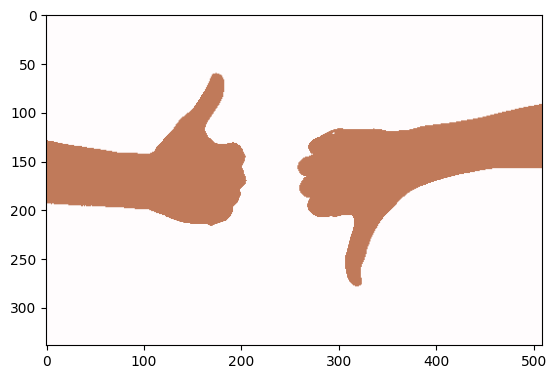

In [20]:
pixel_val = game.reshape((-1,3))
pixelval = np.float32(pixel_val)
creteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,1.0)
k = 2
summa,label, center = cv2.kmeans(pixelval,k,None,creteria,10,cv2.KMEANS_RANDOM_CENTERS)
label = label.reshape(game.shape[0],game.shape[1])
center = np.uint32(center)
krasm = center[label.flatten()]
krasm = krasm.reshape(game.shape)
plt.imshow(krasm)

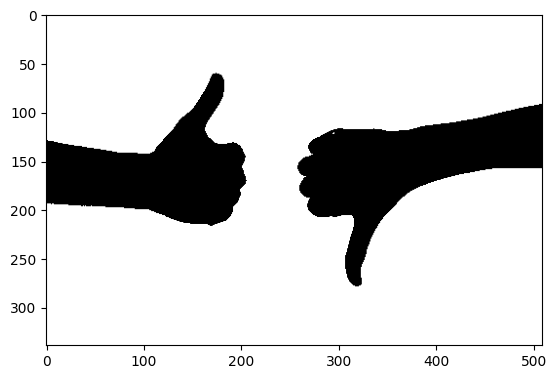

In [24]:
plt.imshow(label==1,cmap='gray')

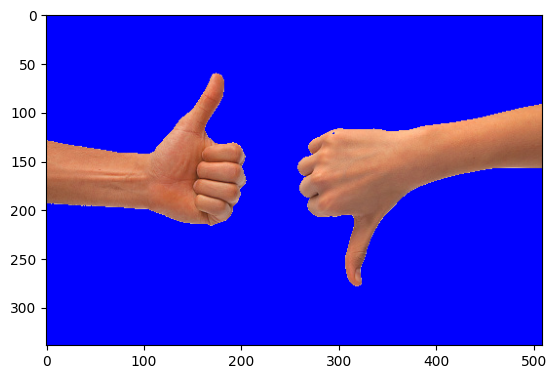

In [27]:
rasm = np.copy(game)
rasm[label==1] = [0,0,255]
plt.imshow(rasm)

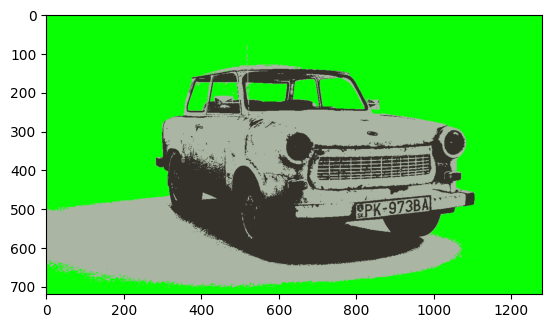

In [83]:
r = cv2.imread('rasm/car.jpg')
r = cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
p_val = r.reshape((-1,3))
p_val = np.float32(p_val)
creteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.1)
k=3
summa,label,senter = cv2.kmeans(p_val,k,None,creteria,10,cv2.KMEANS_RANDOM_CENTERS)
label = label.reshape(r.shape[0],r.shape[1])
senter = np.uint32(senter)
krasm = senter[label.flatten()]
krasm = krasm.reshape(r.shape)
#plt.imshow(label==1,cmap='gray')
plt.imshow(krasm,cmap='gray')


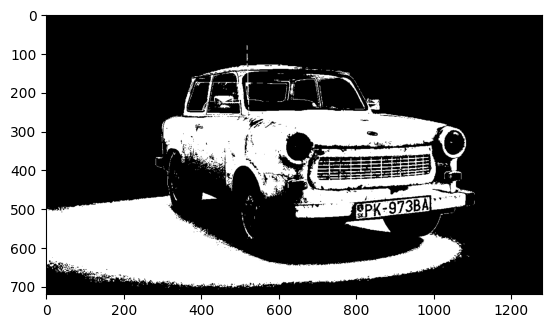

In [86]:
plt.imshow(label==0,cmap='gray')